# Brest Cancer Wisconsin - Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Dataset 
df=pd.read_csv("brestcancer.csv") 
df.head()

,Unnamed: 0,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,0,1000025,5,1,1,1,2,1,3,1,1,2
1,1,1002945,5,4,4,5,7,10,3,2,1,2
2,2,1015425,3,1,1,1,2,2,3,1,1,2
3,3,1016277,6,8,8,1,3,4,3,7,1,2
4,4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].replace('?','0')
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '0', '5', '8', '6'],
      dtype=object)

In [ ]:
df.bare_nuclei=pd.to_numeric(df.bare_nuclei).astype("int64")
df.dtypes

Unnamed: 0                int64
id                        int64
clump_thickness           int64
uniform_cell_size         int64
uniform_cell_shape        int64
marginal_adhesion         int64
single_epithelial_size    int64
bare_nuclei               int64
bland_chromatin           int64
normal_nucleoli           int64
mitoses                   int64
class                     int64
dtype: object

In [ ]:
# Check for null values
pd.isnull(df).sum()

Unnamed: 0                0
id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [ ]:
# Outcome Feature (Class) values
df['class'].unique()

array([2, 4])

In [ ]:
# Data Description
df.describe()

,Unnamed: 0,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,349.000000,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,201.928205,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,0.000000,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,174.500000,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,349.000000,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,523.500000,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,698.000000,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


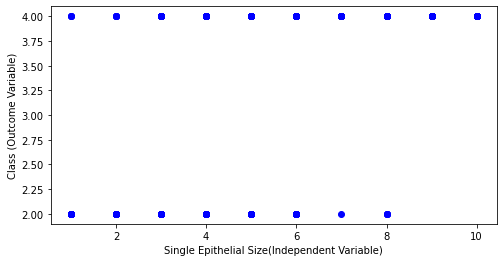

In [ ]:
# Scatter Plot 
X=df["clump_thickness"]
Y=df["class"]
plt.figure(figsize=(8,4))
plt.scatter(X,Y, marker='o', color='blue')
plt.xlabel("Single Epithelial Size(Independent Variable)")
plt.ylabel("Class (Outcome Variable)")
plt.show()

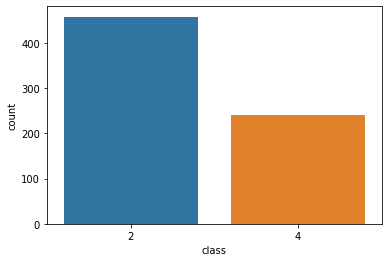

In [ ]:
# Count Plot
sns.countplot(x="class",data=df)

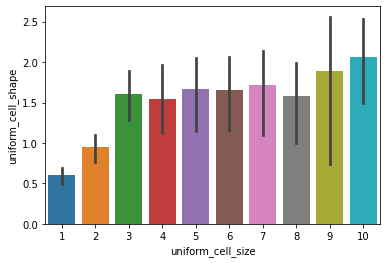

In [ ]:
# Barplot
sns.barplot(x='uniform_cell_size',y='uniform_cell_shape',data=df,estimator=np.std)

In [ ]:
# Separating the Dependent and Independent Features
X=df[["clump_thickness","uniform_cell_size","uniform_cell_shape","marginal_adhesion",
 "single_epithelial_size","bare_nuclei","bland_chromatin","normal_nucleoli","mitoses"]]
y=df["class"]

In [ ]:
from sklearn.model_selection import train_test_split
# x_train & y_train for Train the model
# x_test & y_test for Test/ Predict model
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)

In [ ]:
# Check train and test data shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(489, 9)
(210, 9)
(489,)
(210,)


In [ ]:
#Support Vector Machine

In [ ]:
from sklearn import svm
# Build SVM Classifier Model (Support Vector Classifier)
svc = svm.SVC(kernel= 'linear')

In [ ]:
# Train Model
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
# Predicting Outcome Class
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [ ]:
# Confusion Matrix from predicted and actual class values
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)

Confusion Matrix :
[[129   6]
 [  4  71]]


In [ ]:
# Accuracy Score of Class prediction
acc=accuracy_score(y_test, y_pred)*100
svm=acc
svm

96.19047619047619

In [ ]:
cr = classification_report(y_test, y_pred)
print('Classification Report:')
print(cr)

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.96      0.96       135
           4       0.92      0.95      0.93        75

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



In [ ]:
# Comparision of Real and Predicted Class values
out = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_pred})
out.head(10)

,Real_class,Predicted_class
476,2,2
531,2,2
40,2,4
432,2,2
14,4,4
157,2,2
266,4,4
31,2,2
251,4,4
103,4,4


In [ ]:
#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression ( solver = 'liblinear')
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cn1 = confusion_matrix(y_test, pred)
ac1 = accuracy_score(y_test, pred)
cr1 = classification_report(y_test, pred)

In [ ]:
print('Confusion Matrix :')
print(cn1)

Confusion Matrix :
[[129   6]
 [  5  70]]


In [ ]:
log = ac1*100
log

94.76190476190476

In [ ]:
print('Classification Report:')
print(cr1)

Classification Report:
              precision    recall  f1-score   support

           2       0.96      0.96      0.96       135
           4       0.92      0.93      0.93        75

    accuracy                           0.95       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210



In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
#Predicting the output for the X_test values 
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cn2 = confusion_matrix(y_test, y_pred)
ac2 = accuracy_score(y_test, y_pred)
cr2 = classification_report(y_test, y_pred)

In [ ]:
print('Confusion Matrix :')
print(cn2)

Confusion Matrix :
[[130   5]
 [  3  72]]


In [ ]:
knn = ac2*100
knn

96.19047619047619

In [ ]:
print('Classification Report:')
print(cr2)

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.96      0.97       135
           4       0.94      0.96      0.95        75

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



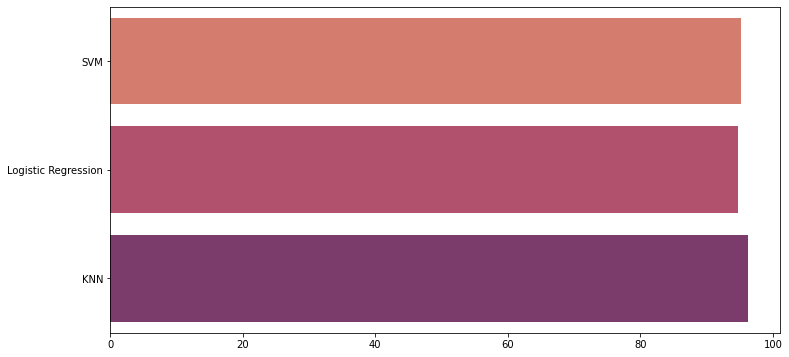

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
model_acc = [svm,log,knn]
model_name = ['SVM','Logistic Regression','KNN']
sns.barplot(x=model_acc,y=model_name,palette = 'flare')